## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. Now, although X Education gets a lot of leads, its lead conversion rate is very poor. X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of the Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [642]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score

In [643]:
leads = pd.read_csv("leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [644]:
leads.shape

(9240, 37)

In [645]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [646]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [647]:
leads.head(1)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified


In [648]:
# Check for Duplcates in Prospect ID

duplicate_ProspectID = leads[leads.duplicated('Prospect ID')]
duplicate_ProspectID

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [649]:
# Check for Duplcates in Prospect ID

duplicate_LeadNumber = leads[leads.duplicated('Lead Number')]
duplicate_LeadNumber

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [650]:
# Drop 'Prospect ID' as Unique Record can be identified from Lead Number

leads.drop(['Prospect ID'], 1, inplace = True)



In [651]:
leads.head(1)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified


## Null Value Analysis

In [652]:
#  Checking the Null Value 
leads.isnull().sum().sort_values(ascending = False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
I agree to pay the amount through cheque            0
A free copy of Mastering The

In [653]:
#checking percentage of null values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending = False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
I agree to pay the amount through cheque          0.00
A free cop

In [654]:
#Replace  'Select' values to NaN for Null Handling

leads = leads.replace('Select', np.nan)

In [655]:
#checking percentage of null values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
I agree to pay the amount through cheque          0.00
A free cop

In [656]:
#dropping cols with more than 45% missing values

cols=leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 45):
        leads.drop(i, 1, inplace = True)

In [657]:
#checking percentage of null values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Number                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Search    

In [658]:
leads.head(1)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified


## Categorical Columns Analysis:

In [659]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

## Value Counts for all Attributes 

In [660]:
round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Number                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Search    

In [661]:
#  Checking the Null Value 
leads.isnull().sum().sort_values(ascending = False)

City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
Update me on Supply Chain Content                   0
Lead Number                                         0
Digital Advertisement                               0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Through Recommendations                             0
Search                      

In [662]:
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

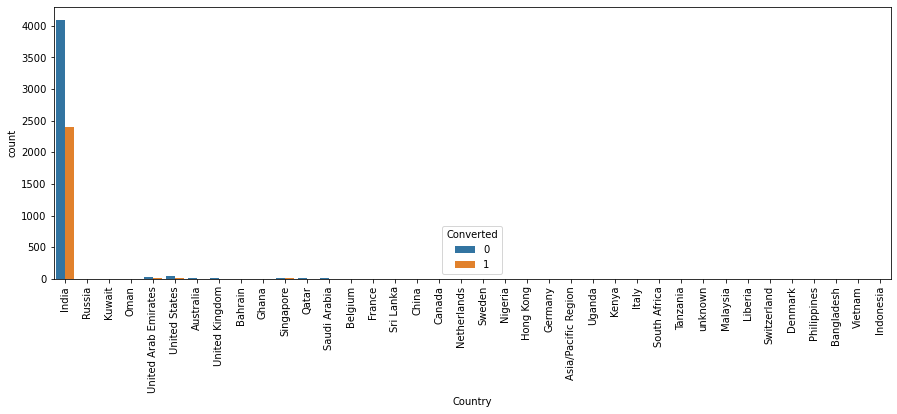

In [663]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Country, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [664]:
# Replace the Missing Value of Country as India
leads['Country'].mode()

0    India
dtype: object

In [665]:
leads['Country'] = leads['Country'].replace(np.nan, leads['Country'].mode()[0])

In [666]:
leads['Country'].value_counts(dropna=False)

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [667]:
leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [668]:
leads['City'] = leads['City'].replace(np.nan, leads['City'].mode()[0])

In [669]:
leads['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

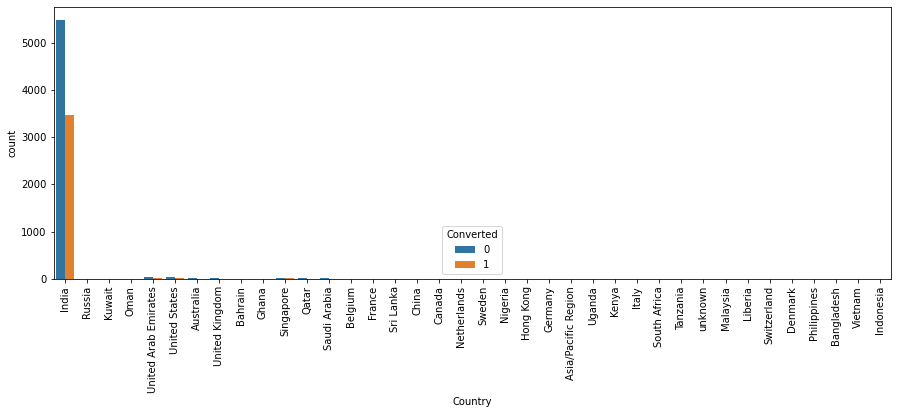

In [670]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Country, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [671]:
#  Checking the Null Value 
leads.isnull().sum().sort_values(ascending = False)

Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Through Recommendations                             0
Receive More Updates About Our Courses              0
Lead Number                                         0
Update me on Supply Chain Content                   0
Newspaper                                           0
Get updates on DM Content                           0
City                                                0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Digital Advertisement                               0
Search                      

In [672]:
leads['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [673]:
# Replace the Missing Value of City with Max occuraing values
leads['City'].mode()

0    Mumbai
dtype: object

In [674]:
leads['City'] = leads['City'].replace(np.nan, leads['City'].mode()[0])

In [675]:
leads['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

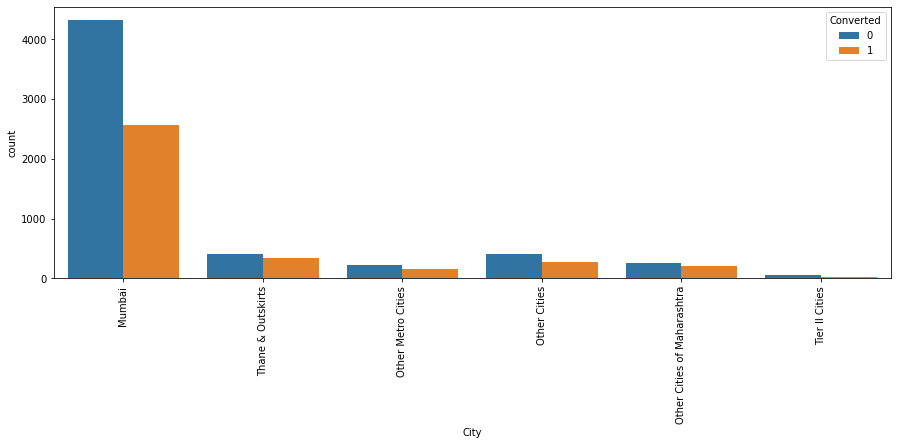

In [676]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(leads.City, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [677]:
#  Checking the Null Value 
leads.isnull().sum().sort_values(ascending = False)

Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Through Recommendations                             0
Receive More Updates About Our Courses              0
Lead Number                                         0
Update me on Supply Chain Content                   0
Newspaper                                           0
Get updates on DM Content                           0
City                                                0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Digital Advertisement                               0
Search                      

In [678]:
round(100*(leads.isnull().sum()/len(lead.index)), 2).sort_values(ascending = False)

NameError: name 'lead' is not defined

In [ ]:
leads['Specialization'].value_counts(dropna=False)

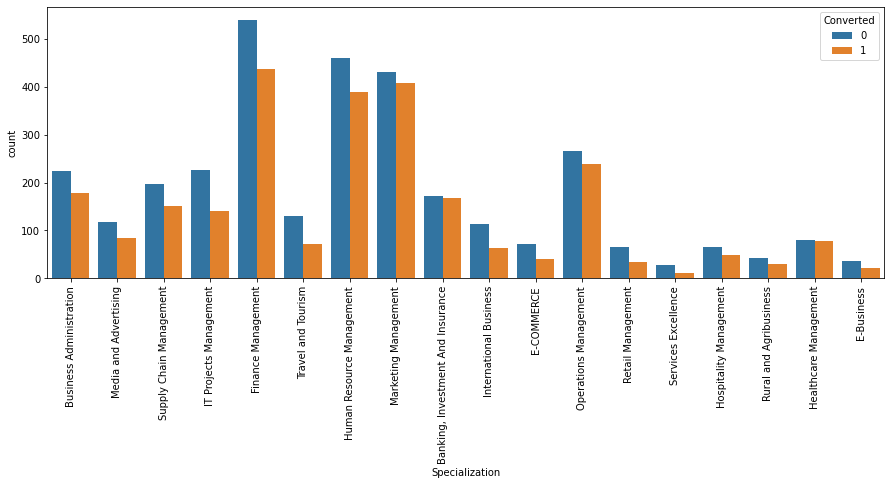

In [679]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [680]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, "not-specified")

In [681]:
leads['Specialization'].value_counts(dropna=False)

not-specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [682]:
#combining Management Specializations because they show similar trends

leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations') 

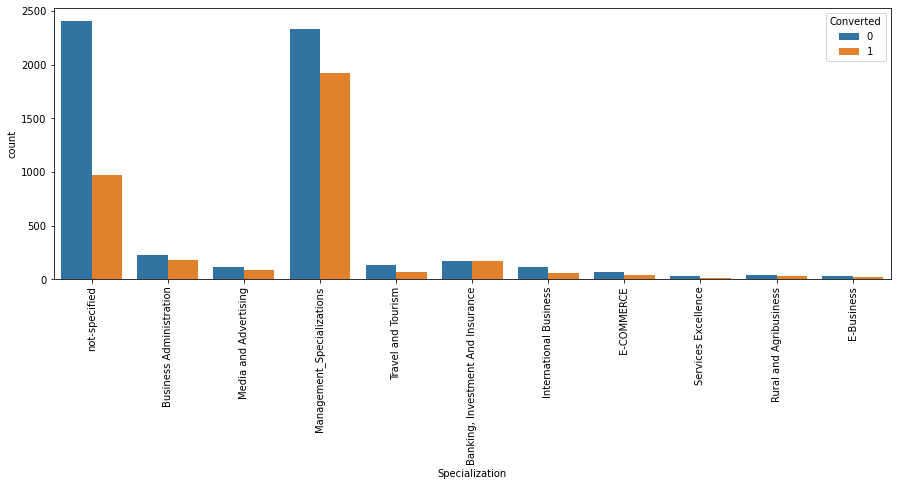

In [683]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [684]:
round(100*(leads.isnull().sum()/len(lead.index)), 2).sort_values(ascending = False)

NameError: name 'lead' is not defined

In [685]:
#What is your current occupation

leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [686]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, leads['What is your current occupation'].mode()[0])

In [687]:
#What is your current occupation

leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [688]:
#What is your current occupation

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

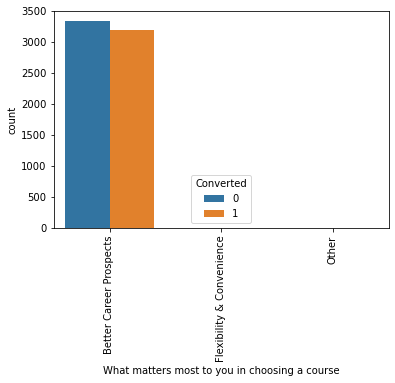

In [689]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads['What matters most to you in choosing a course'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [690]:
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan, leads['What matters most to you in choosing a course'].mode()[0])

In [691]:
#What is your current occupation

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

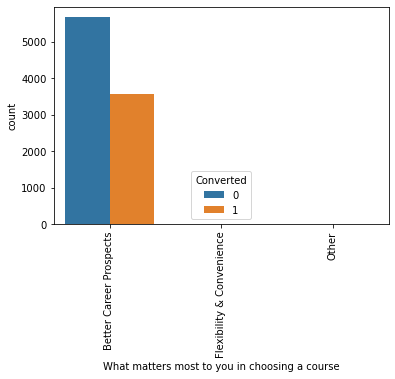

In [692]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads['What matters most to you in choosing a course'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [693]:
#What is your current occupation

leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [694]:
#replacing tags with low frequency with "Other Tags"
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

leads['Tags'] = leads['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [695]:
#What is your current occupation

leads['Tags'].value_counts(dropna=False)

NaN                                    3353
Will revert after reading the email    2072
Other_Tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

In [696]:
#replacing Nan values with "Not Specified"
leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

In [697]:
#What is your current occupation

leads['Tags'].value_counts(dropna=False)

Not Specified                          3353
Will revert after reading the email    2072
Other_Tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

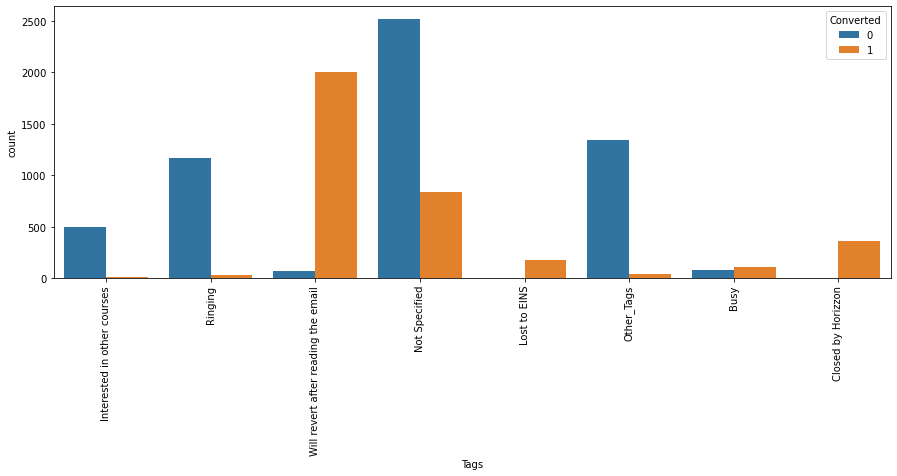

In [698]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Tags'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [699]:
round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending = False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Lead Number                                      0.00
X Education Forums                               0.00
A free copy of Mastering The Interview           0.00
I agree to pay the amount through cheque         0.00
City                                             0.00
Get updates on DM Content                        0.00
Update me on Supply Chain Content                0.00
Tags                                             0.00
Receive More Updates About Our Courses           0.00
Through Recommendations                          0.00
Digital Advertisement                            0.00
Newspaper                                        0.00
Search                                           0.00
Newspaper Article                                0.00
Magazine                    

In [700]:
leads.head(1)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified


In [701]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [702]:
round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending = False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Lead Number                                      0.00
X Education Forums                               0.00
A free copy of Mastering The Interview           0.00
I agree to pay the amount through cheque         0.00
City                                             0.00
Get updates on DM Content                        0.00
Update me on Supply Chain Content                0.00
Tags                                             0.00
Receive More Updates About Our Courses           0.00
Through Recommendations                          0.00
Digital Advertisement                            0.00
Newspaper                                        0.00
Search                                           0.00
Newspaper Article                                0.00
Magazine                    

In [703]:
#checking value counts of Lead Source column

leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [704]:
#checking value counts of Lead Source column

leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [705]:
#replacing Nan Values and combining low frequency values
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')   

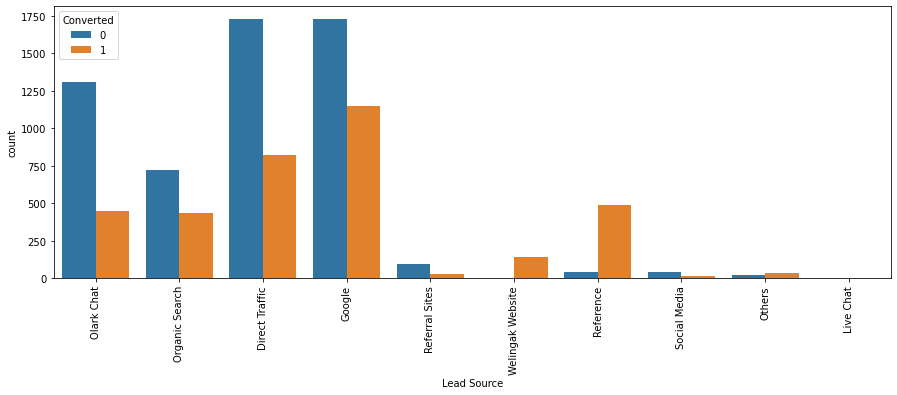

In [706]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [707]:
# Last Activity:

leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [708]:
#replacing Nan Values and combining low frequency values

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [709]:
# Last Activity:

leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [710]:
#Check the Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [711]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
leads = leads.dropna()

In [712]:
#Checking percentage of Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [713]:
#Lead Origin
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

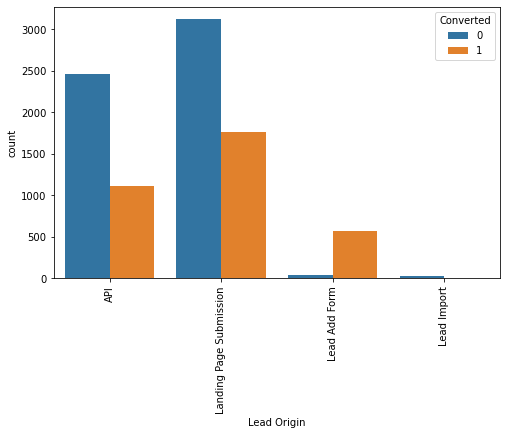

In [714]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Lead Origin'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

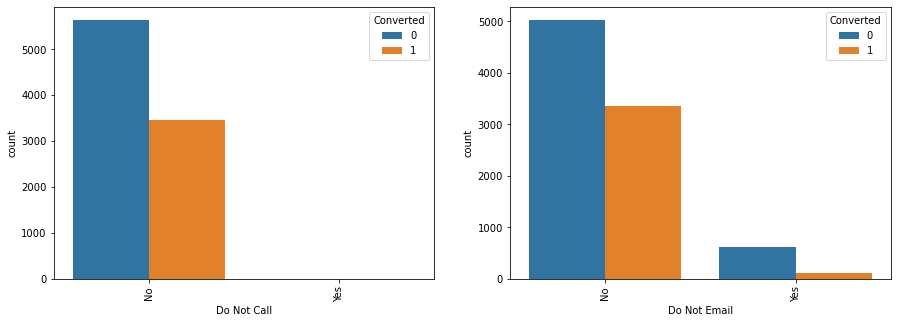

In [715]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(leads['Do Not Call'], hue=leads.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(leads['Do Not Email'], hue=leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [716]:
#checking value counts for Do Not Call
leads['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [717]:
#checking value counts for Do Not Email
leads['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [718]:
cols_to_drop=['Country']

In [719]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'Do Not Call']

In [720]:
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'Do Not Call', 'What matters most to you in choosing a course']

In [721]:
# IMBALANCED VARIABLES THAT CAN BE DROPPED

In [722]:
leads.Search.value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [723]:
leads.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [724]:
leads['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [725]:
leads['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [726]:
leads['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [727]:
leads['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [728]:
leads['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [729]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [730]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [731]:
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [732]:
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [733]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [734]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [735]:
#adding imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [736]:
cols_to_drop

['Country',
 'Do Not Call',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [737]:
#checking value counts of last Notable Activity
leads['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [738]:
#clubbing lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

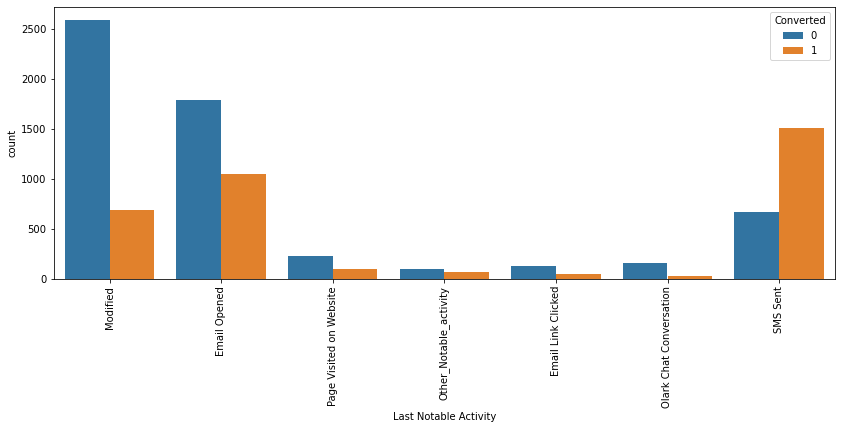

In [739]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [740]:
#checking value counts for variable

leads['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [741]:
#list of columns to be dropped
cols_to_drop

['Country',
 'Do Not Call',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [742]:
#dropping columns
leads = leads.drop(cols_to_drop,1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9103 non-null   int64  
 1   Lead Origin                             9103 non-null   object 
 2   Lead Source                             9103 non-null   object 
 3   Do Not Email                            9103 non-null   object 
 4   Converted                               9103 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9103 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9103 non-null   object 
 9   Specialization                          9103 non-null   object 
 10  What is your current occupation         9103 non-null   obje

In [743]:
leads.head(1)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,not-specified,Unemployed,Interested in other courses,Mumbai,No,Modified


## Numerical Attributes Analysis:


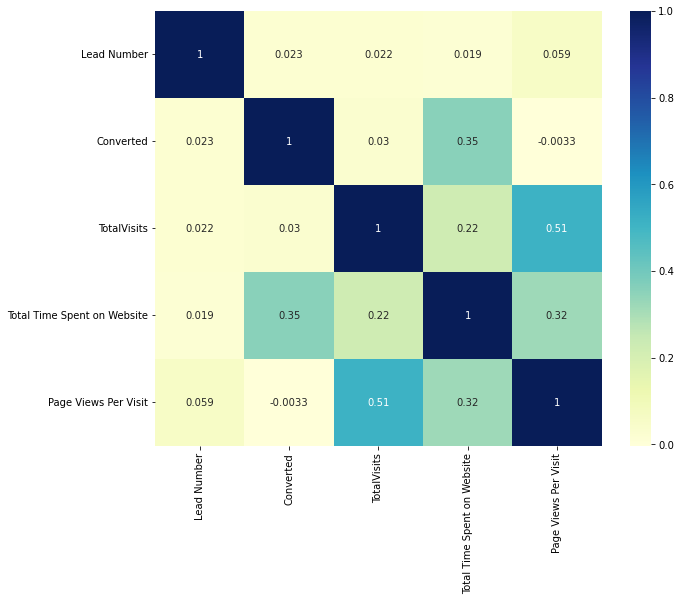

In [744]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

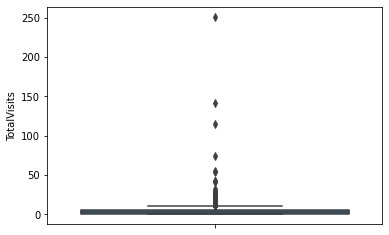

In [745]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [746]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

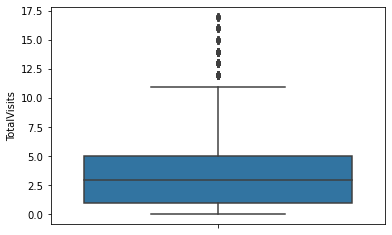

In [747]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [748]:
leads.shape

(9020, 15)

In [749]:
leads.head(1)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,not-specified,Unemployed,Interested in other courses,Mumbai,No,Modified


In [750]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

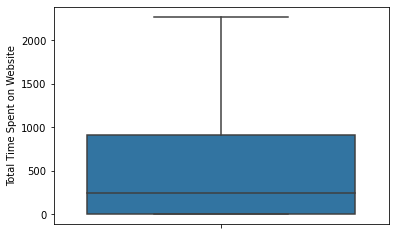

In [751]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

In [752]:
#checking percentiles for "Total Time Spent on Website"

leads['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

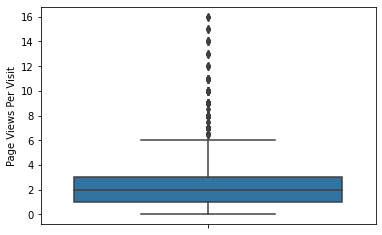

In [753]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

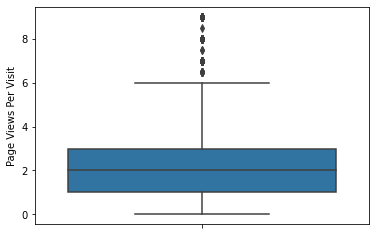

In [754]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

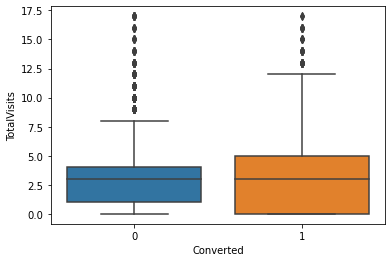

In [755]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

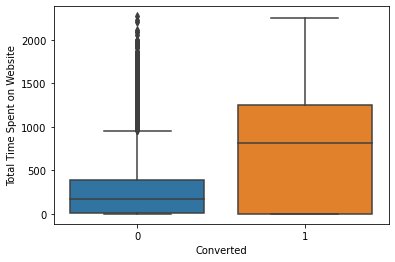

In [756]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

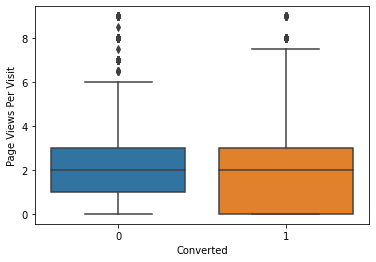

In [757]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

In [758]:
#checking missing values in leftover columns/

round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

## Dummy Variable Creation

In [759]:
leads.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,not-specified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,not-specified,Unemployed,Ringing,Mumbai,No,Email Opened


In [760]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             8953 non-null   int64  
 1   Lead Origin                             8953 non-null   object 
 2   Lead Source                             8953 non-null   object 
 3   Do Not Email                            8953 non-null   object 
 4   Converted                               8953 non-null   int64  
 5   TotalVisits                             8953 non-null   float64
 6   Total Time Spent on Website             8953 non-null   int64  
 7   Page Views Per Visit                    8953 non-null   float64
 8   Last Activity                           8953 non-null   object 
 9   Specialization                          8953 non-null   object 
 10  What is your current occupation         8953 non-null   obje

In [761]:
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4769
API                        3546
Lead Add Form               607
Lead Import                  31
Name: Lead Origin, dtype: int64

In [762]:
leads['Lead Source'].value_counts(dropna=False)

Google              2841
Direct Traffic      2499
Olark Chat          1751
Organic Search      1092
Reference            442
Welingak Website     129
Referral Sites       117
Others                47
Social Media          33
Live Chat              2
Name: Lead Source, dtype: int64

In [763]:
leads['Do Not Email'].value_counts(dropna=False)

No     8256
Yes     697
Name: Do Not Email, dtype: int64

In [764]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3390
SMS Sent                     2700
Olark Chat Conversation       966
Page Visited on Website       594
Converted to Lead             428
Email Bounced                 310
Email Link Clicked            264
Others                        187
Form Submitted on Website     114
Name: Last Activity, dtype: int64

In [765]:
leads['Specialization'].value_counts(dropna=False)

Management_Specializations           4126
not-specified                        3284
Business Administration               390
Banking, Investment And Insurance     325
Media and Advertising                 197
Travel and Tourism                    189
International Business                171
E-COMMERCE                            107
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    38
Name: Specialization, dtype: int64

In [766]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              8053
Working Professional     667
Student                  204
Other                     13
Housewife                  9
Businessman                7
Name: What is your current occupation, dtype: int64

In [767]:
leads['Tags'].value_counts(dropna=False)

Not Specified                          3284
Will revert after reading the email    2002
Other_Tags                             1358
Ringing                                1162
Interested in other courses             505
Closed by Horizzon                      290
Busy                                    183
Lost to EINS                            169
Name: Tags, dtype: int64

In [768]:
leads['City'].value_counts(dropna=False)

Mumbai                         6687
Thane & Outskirts               723
Other Cities                    669
Other Cities of Maharashtra     438
Other Metro Cities              364
Tier II Cities                   72
Name: City, dtype: int64

In [769]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6155
Yes    2798
Name: A free copy of Mastering The Interview, dtype: int64

In [770]:
leads['Last Notable Activity'].value_counts(dropna=False)

Modified                   3224
Email Opened               2789
SMS Sent                   2143
Page Visited on Website     288
Olark Chat Conversation     182
Email Link Clicked          170
Other_Notable_activity      157
Name: Last Notable Activity, dtype: int64

In [771]:
categorical = ['Lead Origin','Lead Source','Do Not Email',
               'Last Activity','Specialization',
               'What is your current occupation',
               'Tags','City','A free copy of Mastering The Interview','Last Notable Activity'
              ]

In [772]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [773]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

0    6155
1    2798
Name: A free copy of Mastering The Interview, dtype: int64

In [774]:
leads['Do Not Email'].value_counts(dropna=False)

0    8256
1     697
Name: Do Not Email, dtype: int64

In [775]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads = pd.concat([leads,dummy],1)

In [776]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_not-specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [777]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [778]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [779]:
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [780]:
dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [781]:
#dropping the original columns after dummy variable creation

leads.drop(categorical,1,inplace = True)

In [782]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 58 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           8953 non-null   int64  
 1   Converted                                             8953 non-null   int64  
 2   TotalVisits                                           8953 non-null   float64
 3   Total Time Spent on Website                           8953 non-null   int64  
 4   Page Views Per Visit                                  8953 non-null   float64
 5   Lead Origin_Landing Page Submission                   8953 non-null   uint8  
 6   Lead Origin_Lead Add Form                             8953 non-null   uint8  
 7   Lead Origin_Lead Import                               8953 non-null   uint8  
 8   What is your current occupation_Housewife             8953

## Train-Test Split & Logistic Regression Model Building:



In [783]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = leads['Converted']

y.head()

X=leads.drop('Converted', axis=1)

In [784]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [785]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 57 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           6267 non-null   int64  
 1   TotalVisits                                           6267 non-null   float64
 2   Total Time Spent on Website                           6267 non-null   int64  
 3   Page Views Per Visit                                  6267 non-null   float64
 4   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 6   Lead Origin_Lead Import                               6267 non-null   uint8  
 7   What is your current occupation_Housewife             6267 non-null   uint8  
 8   What is your current occupation_Other                 6

In [786]:
y_train.head()

9196    1
4696    0
3274    0
2164    0
1667    1
Name: Converted, dtype: int64

In [787]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,-1.602170,0.668862,1.848117,1.455819,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4696,-0.099972,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3274,0.498345,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2164,0.948193,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1667,1.123189,0.319082,1.258415,-0.481679,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [788]:
leads.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
Lead Number,1.000000,0.023864,0.049703,0.019885,0.062331,-0.066466,0.023686,0.076491,-0.013987,-0.008974,...,-0.032129,0.002644,-0.168121,0.021538,0.002354,0.069033,-0.004708,-0.129752,-0.030937,0.037240
Converted,0.023864,1.000000,0.044338,0.352502,-0.006128,-0.041719,0.309347,-0.010798,0.040588,0.012517,...,-0.073432,-0.032892,0.364912,0.054674,0.231501,-0.179112,0.170708,-0.306094,-0.279228,0.654624
TotalVisits,0.049703,0.044338,1.000000,0.351449,0.721126,0.434271,-0.269124,-0.058567,-0.007632,0.022366,...,-0.053982,0.195074,0.016892,0.052961,0.009236,-0.000043,0.009842,-0.007861,0.082039,0.054428
Total Time Spent on Website,0.019885,0.352502,0.351449,1.000000,0.350523,0.296223,-0.194413,-0.051486,0.007263,0.032874,...,-0.051839,0.030384,0.133825,0.061506,0.034900,-0.051775,0.075760,-0.089459,-0.052149,0.264129
Page Views Per Visit,0.062331,-0.006128,0.721126,0.350523,1.000000,0.538432,-0.303051,-0.062481,-0.007257,0.016811,...,-0.094010,0.027936,0.067204,0.064726,-0.059678,0.010737,-0.024919,0.013438,0.128248,0.062252
Lead Origin_Landing Page Submission,-0.066466,-0.041719,0.434271,0.296223,0.538432,1.000000,-0.287921,-0.062931,0.001455,0.000443,...,-0.117304,0.036275,0.049048,0.072019,-0.043594,-0.058221,0.034510,0.102746,0.134583,0.034168
Lead Origin_Lead Add Form,0.023686,0.309347,-0.269124,-0.194413,-0.303051,-0.287921,1.000000,-0.015897,0.033505,-0.010284,...,-0.026255,-0.013914,0.125686,-0.038957,0.276904,-0.060159,0.018093,-0.106604,-0.073744,0.193285
Lead Origin_Lead Import,0.076491,-0.010798,-0.058567,-0.051486,-0.062481,-0.062931,-0.015897,1.000000,-0.001870,-0.002248,...,-0.008491,-0.010746,-0.028610,-0.008515,-0.010785,-0.006170,-0.008176,0.001579,0.028157,0.000310
What is your current occupation_Housewife,-0.013987,0.040588,-0.007632,0.007263,-0.007257,0.001455,0.033505,-0.001870,1.000000,-0.001210,...,-0.004569,-0.005783,-0.017795,-0.004582,0.053923,-0.007756,-0.004400,-0.013413,-0.012251,0.033731
What is your current occupation_Other,-0.008974,0.012517,0.022366,0.032874,0.016811,0.000443,-0.010284,-0.002248,-0.001210,1.000000,...,-0.005493,-0.006952,-0.021391,-0.005508,-0.006977,0.003391,-0.005289,0.024762,-0.014727,0.028815


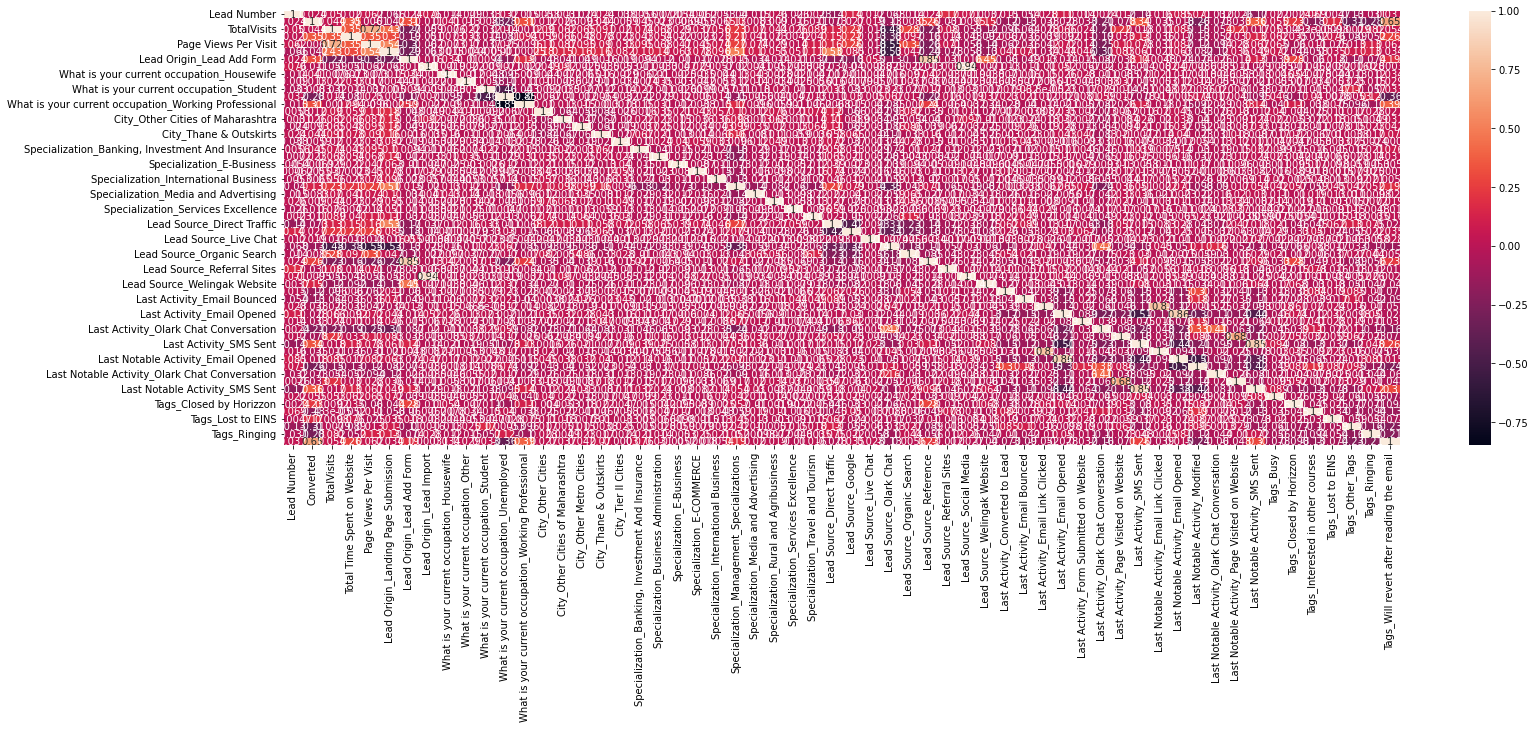

In [789]:
plt.figure(figsize=(25,8))
sns.heatmap(leads.corr(),annot = True)
plt.show()

In [790]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 58 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           8953 non-null   int64  
 1   Converted                                             8953 non-null   int64  
 2   TotalVisits                                           8953 non-null   float64
 3   Total Time Spent on Website                           8953 non-null   int64  
 4   Page Views Per Visit                                  8953 non-null   float64
 5   Lead Origin_Landing Page Submission                   8953 non-null   uint8  
 6   Lead Origin_Lead Add Form                             8953 non-null   uint8  
 7   Lead Origin_Lead Import                               8953 non-null   uint8  
 8   What is your current occupation_Housewife             8953

## Model Building & RFE

In [791]:
import statsmodels.api as sm


In [792]:
logml = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6209
Model Family:                Binomial   Df Model:                           57
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1176.1
Date:                Sat, 07 Jan 2023   Deviance:                       2352.3
Time:                        11:14:46   Pearson chi2:                 7.85e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7657      2.009      0.381      0.703      -3.172       4.703
Lead Number                                              0.0855      0.060      1.431      0.153      -0.032       0.203
TotalVisits                                              0.2264      0.077      2.940      0.003       0.075       0.377
Total Time Spent on Website                              1.0830      0.064     16.979      0.000       0.958       1.208
Page Views Per Visit                                    -0.2874      0.097     -2.973      0.003      -0.477      -0.098
Lead Origin_Landing Page Submission                     -0.7230      0.241     -3.000      0.003      -1.195      -0.251
Lead Origin_Lead Add Form                                1.0766      1.224      0.880      0.379      -1.322       3.475
Lead Origin_Lead Import                                 22.8332   2.48e+04      0.001      0.999   -4.86e+04    4.86e+04
What is your current occupation_Housewife               19.3400   1.96e+04      0.001      0.999   -3.85e+04    3.85e+04
What is your current occupation_Other                   -0.3192      2.605     -0.123      0.902      -5.425       4.787
What is your current occupation_Student                  0.2278      1.822      0.125      0.900      -3.343       3.799
What is your current occupation_Unemployed              -0.1654      1.720     -0.096      0.923      -3.537       3.207
What is your current occupation_Working Professional     0.8366      1.764      0.474      0.635      -2.621       4.294
City_Other Cities                                        0.2658      0.232      1.147      0.251      -0.188       0.720
City_Other Cities of Maharashtra                        -0.0922      0.290     -0.318      0.750      -0.660       0.476
City_Other Metro Cities                                  0.0014      0.311      0.004      0.996      -0.609       0.612
City_Thane & Outskirts                                  -0.0776      0.229     -0.339      0.735      -0.526       0.371
City_Tier II Cities                                      0.3353      0.625      0.537      0.591      -0.889       1.560
Specialization_Banking, Investment And Insurance         0.5419      0.372      1.455      0.146      -0.188       1.272
Specialization_Business Administration                  -0.0320      0.352     -0.091      0.928      -0.723       0.659
Specialization_E-Business                                0.1784      0.672      0.266      0.791      -1.138       1.495
Specialization_E-COMMERCE                                0.3217      0.513      0.627      0.531      -0.684       1.328
Specialization_International Business                   -0

In [793]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [794]:
rfe.support_

array([False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True])

In [795]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 38),
 ('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('What is your current occupation_Housewife', False, 31),
 ('What is your current occupation_Other', False, 34),
 ('What is your current occupation_Student', False, 23),
 ('What is your current occupation_Unemployed', False, 20),
 ('What is your current occupation_Working Professional', False, 8),
 ('City_Other Cities', False, 22),
 ('City_Other Cities of Maharashtra', False, 37),
 ('City_Other Metro Cities', False, 40),
 ('City_Thane & Outskirts', False, 39),
 ('City_Tier II Cities', False, 28),
 ('Specialization_Banking, Investment And Insurance', False, 14),
 ('Specialization_Business Administration', False, 41),
 ('Specialization_E-Business', False, 35),
 ('Specialization_E-COMMERCE', False, 21),
 ('Specializati

In [796]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [797]:
X_train.columns[~rfe.support_]

Index(['Lead Number', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Touris

In [798]:

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.7
Date:                Sat, 07 Jan 2023   Deviance:                       2509.3
Time:                        11:14:52   Pearson chi2:                 8.34e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1899      0.088    -13.480      0.000      -1.363      -1.017
Total Time Spent on Website                       0.8970      0.053     16.999      0.000       0.794       1.000
Lead Origin_Lead Add Form                         1.6712      0.450      3.714      0.000       0.789       2.553
Lead Source_Direct Traffic                       -0.8320      0.129     -6.471      0.000      -1.084      -0.580
Lead Source_Referral Sites                       -0.5284      0.465     -1.138      0.255      -1.439       0.382
Lead Source_Welingak Website                      3.9043      1.110      3.518      0.000       1.729       6.079
Last Activity_SMS Sent                            1.2373      0.223      5.555      0.000       0.801       1.674
Last Notable Activity_Modified                   -1.2839      0.150     -8.532      0.000      -1.579      -0.989
Last Notable Activity_Olark Chat Conversation    -1.7123      0.490     -3.496      0.000      -2.672      -0.752
Last Notable Activity_SMS Sent                    1.0151      0.257      3.943      0.000       0.511       1.520
Tags_Closed by Horizzon                           6.9834      1.019      6.853      0.000       4.986       8.981
Tags_Interested in other courses                 -2.1641      0.407     -5.321      0.000      -2.961      -1.367
Tags_Lost to EINS                                 5.7302      0.608      9.419      0.000       4.538       6.923
Tags_Other_Tags                                  -2.4417      0.210    -11.633      0.000      -2.853      -2.030
Tags_Ringing                                     -3.5858      0.243    -14.752      0.000      -4.062      -3.109
Tags_Will revert after reading the email          4.4263      0.185     23.989      0.000       4.065       4.788
=================================================================================================================
"""

In [799]:
#dropping column with high p-value

col = col.drop('Lead Source_Referral Sites',1)

In [800]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1255.3
Date:                Sat, 07 Jan 2023   Deviance:                       2510.7
Time:                        11:14:52   Pearson chi2:                 8.34e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2029      0.088    -13.729      0.000      -1.375      -1.031
Total Time Spent on Website                       0.8963      0.053     16.979      0.000       0.793       1.000
Lead Origin_Lead Add Form                         1.6795      0.450      3.735      0.000       0.798       2.561
Lead Source_Direct Traffic                       -0.8224      0.128     -6.409      0.000      -1.074      -0.571
Lead Source_Welingak Website                      3.9060      1.110      3.520      0.000       1.731       6.081
Last Activity_SMS Sent                            1.2437      0.223      5.584      0.000       0.807       1.680
Last Notable Activity_Modified                   -1.2791      0.150     -8.501      0.000      -1.574      -0.984
Last Notable Activity_Olark Chat Conversation    -1.7079      0.489     -3.491      0.000      -2.667      -0.749
Last Notable Activity_SMS Sent                    1.0150      0.257      3.943      0.000       0.510       1.520
Tags_Closed by Horizzon                           6.9868      1.019      6.857      0.000       4.990       8.984
Tags_Interested in other courses                 -2.2028      0.409     -5.391      0.000      -3.004      -1.402
Tags_Lost to EINS                                 5.7337      0.608      9.426      0.000       4.541       6.926
Tags_Other_Tags                                  -2.4401      0.210    -11.625      0.000      -2.852      -2.029
Tags_Ringing                                     -3.5818      0.243    -14.740      0.000      -4.058      -3.106
Tags_Will revert after reading the email          4.4234      0.184     23.993      0.000       4.062       4.785
=================================================================================================================
"""

In [801]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [802]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Notable Activity_SMS Sent,6.22
4,Last Activity_SMS Sent,6.12
1,Lead Origin_Lead Add Form,1.82
5,Last Notable Activity_Modified,1.69
13,Tags_Will revert after reading the email,1.61
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
11,Tags_Other_Tags,1.26
0,Total Time Spent on Website,1.22
8,Tags_Closed by Horizzon,1.21


In [803]:
#dropping variable with high VIF

col = col.drop('Last Notable Activity_SMS Sent',1)

In [804]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.3
Date:                Sat, 07 Jan 2023   Deviance:                       2526.6
Time:                        11:14:53   Pearson chi2:                 8.51e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1179      0.084    -13.382      0.000      -1.282      -0.954
Total Time Spent on Website                       0.8896      0.053     16.907      0.000       0.786       0.993
Lead Origin_Lead Add Form                         1.6630      0.455      3.657      0.000       0.772       2.554
Lead Source_Direct Traffic                       -0.8212      0.127     -6.471      0.000      -1.070      -0.572
Lead Source_Welingak Website                      3.8845      1.114      3.488      0.000       1.701       6.068
Last Activity_SMS Sent                            1.9981      0.113     17.718      0.000       1.777       2.219
Last Notable Activity_Modified                   -1.6525      0.124    -13.279      0.000      -1.896      -1.409
Last Notable Activity_Olark Chat Conversation    -1.8023      0.491     -3.669      0.000      -2.765      -0.839
Tags_Closed by Horizzon                           7.1955      1.020      7.053      0.000       5.196       9.195
Tags_Interested in other courses                 -2.1318      0.406     -5.253      0.000      -2.927      -1.336
Tags_Lost to EINS                                 5.9177      0.611      9.689      0.000       4.721       7.115
Tags_Other_Tags                                  -2.3737      0.206    -11.507      0.000      -2.778      -1.969
Tags_Ringing                                     -3.4531      0.238    -14.532      0.000      -3.919      -2.987
Tags_Will revert after reading the email          4.5070      0.188     24.002      0.000       4.139       4.875
=================================================================================================================
"""

In [805]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.82
12,Tags_Will revert after reading the email,1.56
4,Last Activity_SMS Sent,1.46
5,Last Notable Activity_Modified,1.40
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
10,Tags_Other_Tags,1.25
0,Total Time Spent on Website,1.22
7,Tags_Closed by Horizzon,1.21
11,Tags_Ringing,1.16


In [806]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.283149
4696    0.031440
3274    0.576636
2164    0.006433
1667    0.989105
7024    0.130813
8018    0.024219
778     0.205594
6942    0.002678
4440    0.096716
dtype: float64

In [807]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28314859, 0.0314396 , 0.57663553, 0.00643284, 0.98910464,
       0.13081306, 0.02421913, 0.20559401, 0.00267787, 0.09671623])

In [808]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.283149,9196
1,0,0.031440,4696
2,0,0.576636,3274
3,0,0.006433,2164
4,1,0.989105,1667


In [809]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.283149,9196,0
1,0,0.031440,4696,0
2,0,0.576636,3274,1
3,0,0.006433,2164,0
4,1,0.989105,1667,1


## # Confusion matrix 

In [815]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3693  189]
 [ 281 2104]]


In [816]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9250039891495133


In [817]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [818]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8821802935010482

In [819]:
# Let us calculate specificity
TN / float(TN+FP)

0.9513137557959814

In [820]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04868624420401855


In [821]:
# positive predictive value 
print (TP / float(TP+FP))

0.9175752289576974


In [822]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9292903875188727


# ROC CURVE 

In [823]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [824]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

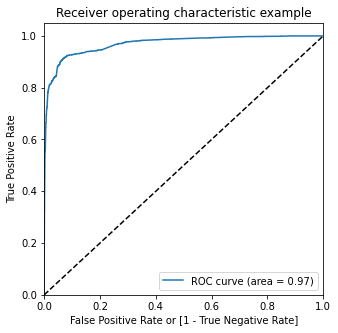

In [825]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

## Finding the Optimal Threshold

In [826]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1


In [827]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.816180  0.971488  0.720762
0.2   0.2  0.901069  0.931237  0.882535
0.3   0.3  0.922930  0.916981  0.926584
0.4   0.4  0.925802  0.901468  0.940752
0.5   0.5  0.925004  0.882180  0.951314
0.6   0.6  0.915909  0.828092  0.969861
0.7   0.7  0.916228  0.810063  0.981453
0.8   0.8  0.906335  0.774843  0.987120
0.9   0.9  0.887027  0.718239  0.990726


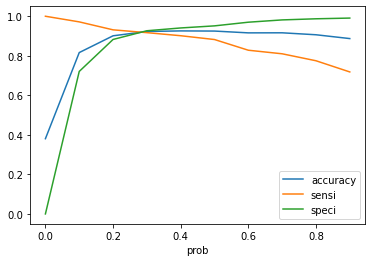

In [828]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [829]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [830]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.283149,9196,0,28
1,0,0.031440,4696,0,3
2,0,0.576636,3274,1,58
3,0,0.006433,2164,0,1
4,1,0.989105,1667,1,99


In [831]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.922929631402585

In [832]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3597,  285],
       [ 198, 2187]], dtype=int64)

In [833]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [834]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9169811320754717

In [835]:
# Let us calculate specificity
TN / float(TN+FP)

0.9265842349304482

In [836]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.07341576506955177


In [837]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8847087378640777


In [838]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9478260869565217


In [839]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3597,  285],
       [ 198, 2187]], dtype=int64)

In [840]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8847087378640777

In [841]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9169811320754717

In [842]:
from sklearn.metrics import precision_recall_curve

In [843]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

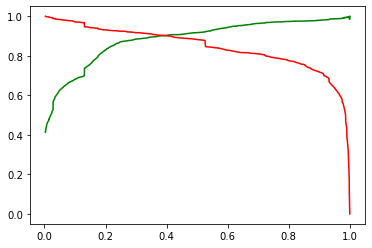

In [844]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## PREDICTION on TEST DATA 

###  Scaling Test DATA 

In [845]:


num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-1.102149,0.575687,-0.311318,0.092860,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
984,1.382751,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8135,-1.238114,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6915,-0.863216,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2712,0.706901,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [846]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.311318,0,1,0,1,0,0,0,0,0,0,1,0
984,-0.550262,0,0,0,1,1,0,0,0,0,1,0,0
8135,0.812462,0,1,0,1,0,0,0,0,0,0,0,0
6915,-0.628665,0,0,0,0,0,0,0,0,0,0,1,0
2712,-0.421456,0,0,0,0,0,0,0,0,0,0,0,1


In [847]:
X_test_sm = sm.add_constant(X_test)

In [848]:
y_test_pred = res.predict(X_test_sm)

In [849]:
y_test_pred[:10]

7681    0.024819
984     0.025692
8135    0.686054
6915    0.005880
2712    0.953208
244     0.002398
4698    0.014697
8287    0.027549
6791    0.981608
8970    0.005703
dtype: float64

In [850]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [851]:
# Let's see the head
y_pred_1.head()

,0
7681,0.024819
984,0.025692
8135,0.686054
6915,0.005880
2712,0.953208


In [852]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [853]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [854]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [855]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [856]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.024819
1,0,984,0.025692
2,0,8135,0.686054
3,0,6915,0.005880
4,1,2712,0.953208


In [857]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [858]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.024819
1,0,984,0.025692
2,0,8135,0.686054
3,0,6915,0.005880
4,1,2712,0.953208


In [859]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [860]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.024819,2
1,984,0,0.025692,3
2,8135,0,0.686054,69
3,6915,0,0.005880,1
4,2712,1,0.953208,95


In [861]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [862]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.024819,2,0
1,984,0,0.025692,3,0
2,8135,0,0.686054,69,1
3,6915,0,0.005880,1,0
4,2712,1,0.953208,95,1


In [863]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9277736411020104

In [864]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1563,  113],
       [  81,  929]], dtype=int64)

In [865]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [866]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9198019801980198

In [867]:
# Let us calculate specificity
TN / float(TN+FP)

0.9325775656324582

In [868]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8915547024952015

In [869]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9198019801980198

## Final Observation:



### <u> Train Data: </u>
- Accuracy : 92.29%
- Sensitivity : 91.70%
- Specificity : 92.66%

### <u> Test Data: </u>
- Accuracy : 92.78%
- Sensitivity : 91.98%
- Specificity : 93.26%